In [12]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import datetime
import plotly
from plotly import graph_objs as go
from datetime import timedelta, datetime

In [4]:
djia_constituents = pd.read_csv(r"C:\Users\malani\Documents\Mean-Reversion-Algorithm-Trading-Bot\Stocks in the Dow Jones Industrial Average.csv")
djia_constituents = djia_constituents.drop(25)
djia_constituents.tail()

,Symbol,Description,Category2,GICS Sector,Market cap,Market Cap Weight,Index Weight,Dividend yield,Country,Action
24,KO,Coca-Cola,Common stocks,Consumer Staples,"$262,541,200,257",2.60%,1.19%,2.84%,USA,Analyze
26,CSCO,Cisco Systems Inc,Common stocks,Information Technology,"$191,431,049,741",1.90%,0.89%,3.21%,USA,Analyze
27,WBA,Walgreen Boots Alliance Inc,Common stocks,Consumer Staples,"$34,704,949,342",0.34%,0.75%,4.69%,USA,Analyze
28,VZ,Verizon Communications Inc,Common stocks,Communication Services,"$160,265,033,778",1.59%,0.75%,6.60%,USA,Analyze
29,INTC,Intel Corporation Corp,Common stocks,Information Technology,"$123,356,030,000",1.22%,0.58%,4.80%,USA,Analyze


In [74]:
# sample = pd.DataFrame(columns=['Ticker', 'Prices'])
sample = {}

# Add a risk tolerence in the future 

for i in range(len(djia_constituents)):
    ticker=yf.Ticker(djia_constituents.iat[i, 0]) 
    data = ticker.history(period= '100d')
    del data['Dividends']
    del data['Stock Splits']
    del data['Open']
    del data['High']
    del data['Low']
    del data['Volume']
    data["STD"] = data["Close"].rolling(20).std()
    data["MIDDLEBB"] = data["Close"].rolling(20).mean()
    data["UPPERBB"] = data["MIDDLEBB"] + 2 * data["STD"]
    data["LOWERBB"] = data["MIDDLEBB"] - 2 * data["STD"]
    data["LOWER_THRESH"] = (data["LOWERBB"] + data["MIDDLEBB"]*0.98) / 2
    data["HIGHER_THRESH"] = (data["UPPERBB"] + data["MIDDLEBB"]*1.02) / 2

    data = data.tail(data.shape[0] - 20)
    
    close_df = data["Close"]
    upperbb_df = data["UPPERBB"]
    lowerbb_df = data["LOWERBB"]

    bbextreme_arr = []
    change1wk_arr = []
    change1mo_arr = []

    for j in range(len(data)):
        try:
            print(data.at[j,"Close"])
            if (close_df.iloc[j] <= lowerbb_df.iloc[j]) and (close_df.iloc[j-1] > lowerbb_df.iloc[j-1]):
                bbextreme_arr.append(-1)
                change1wk_arr.append((close_df.iloc[j+5] - close_df.iloc[j]) / close_df.iloc[j])
                change1mo_arr.append((close_df.iloc[j+30] - close_df.iloc[j]) / close_df.iloc[j])
            elif (close_df.iloc[j] >= upperbb_df.iloc[j]) and (close_df.iloc[j-1] < lowerbb_df.iloc[j-1]):
                bbextreme_arr.append(1)
                change1wk_arr.append((close_df.iloc[j+5] - close_df.iloc[j]) / close_df.iloc[j])
                change1mo_arr.append((close_df.iloc[j+30] - close_df.iloc[j]) / close_df.iloc[j])
            else:
                bbextreme_arr.append(0)
                change1wk_arr.append((close_df.iloc[j+5] - close_df.iloc[j]) / close_df.iloc[j])
                change1mo_arr.append((close_df.iloc[j+30] - close_df.iloc[j]) / close_df.iloc[j])
        except KeyError:
            bbextreme_arr.append(0)
            change1wk_arr.append(0)
            change1mo_arr.append(0)
        except ValueError:
            bbextreme_arr.append(0)
            change1wk_arr.append(0)
            change1mo_arr.append(0)
    
    data["BBEXTREME"] = bbextreme_arr
    data["1WKCHANGE"] = change1wk_arr
    data["1MOCHANGE"] = change1mo_arr

    
    data = data.iloc[1:, :]
    data = data.tail(data.shape[0]-1)

            


    #today = (data["Date"]).stfrtime("%Y-%m-%d")
    #yesterday = datetime.strftime(today - timedelta(1), "%Y-%m-%d")
    
    #x = 0
    #if (data["Close"] <= data["LOWERBB"]) and (djia_constituents.iat[i-1, 0].info('Close')) > data["LOWERBB"]:
    #    data["BBEXTREME"] = -1  
    #elif (data["Close"] => data["LOWERBB"]) and (djia_constituents.iat[i-1, 0].info('Close')) < data["LOWERBB"]:
    #    data["BBEXTREME"] = 1
    #else:
    #    data["BBEXTREME"] = 0
    



    del data["STD"]
    #del data["MIDDLEBB"]

    # sample.insert(i, "Ticker", ticker)
    sample.update({djia_constituents.iat[i, 0] : data})

print(sample['AAPL'])

                                Close    MIDDLEBB     UPPERBB     LOWERBB  \
Date                                                                        
2022-08-02 00:00:00-04:00  159.523407  151.260622  162.867406  139.653838   
2022-08-03 00:00:00-04:00  165.624817  152.417593  164.919902  139.915285   
2022-08-04 00:00:00-04:00  165.305786  153.387634  166.743755  140.031513   
2022-08-05 00:00:00-04:00  165.076172  154.311800  168.234175  140.389426   
2022-08-08 00:00:00-04:00  164.596954  155.320176  169.149903  141.490448   
...                               ...         ...         ...         ...   
2022-11-14 00:00:00-05:00  148.279999  145.559690  156.658121  134.461259   
2022-11-15 00:00:00-05:00  150.039993  145.886093  157.114169  134.658017   
2022-11-16 00:00:00-05:00  148.789993  146.144505  157.391034  134.897977   
2022-11-17 00:00:00-05:00  150.720001  146.522879  157.854445  135.191313   
2022-11-18 00:00:00-05:00  151.289993  146.736073  158.266207  135.205940   

<AxesSubplot:xlabel='Date'>

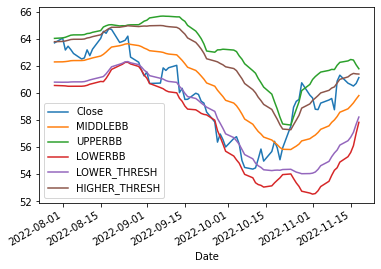

In [46]:
sample['KO'].plot()

In [48]:
today = (data["Date"]).stfrtime("%Y-%m-%d")
yesterday = datetime.strftime(today - timedelta(1), "%Y-%m-%d")

print(yesterday)

KeyError: 'Date'